In [1]:
# Starting work on PCA stuffs...

%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn
# download/load dataset
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# the images
X = dataset.data
# the label to predict is the id of the person
y = dataset.target

# statistics of the data
n_samples, h, w = dataset.images.shape
n_features = X.shape[1]
print("Total dataset size:")
print("n_images: %d" % n_samples)
print("n_features: %d" % n_features)


# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("training size: %d" % len(y_train))
print("test size: %d" % len(y_test))

Total dataset size:
n_images: 1288
n_features: 1850
training size: 966
test size: 322


In [111]:
import numpy as np
## Z-score prescaling
def mean(a, n=False):
    if not n:
        n = len(a)
    sum = 0
    for i in a:
        sum += i
    return sum/n
def std(a, is_population=False, avg=False, n=False):
    if not n:
        n = len(a)
    if not avg:
        avg = mean(a)
    deviances_sum = 0
    for i in range(n):
        deviances_sum += (a[i] -avg)**2
    div = n if is_population else n-1
    
    return (deviances_sum/div)**0.5

def z_score_func(a, stdev=False, avg=False, n=False, is_population=False):
    if not n:
        n = len(a)
    if not avg:
        avg = mean(a, n)
    if not stdev:
        stdev = std(a, is_population=is_population, avg=avg, n=n)
    def z_score(x):
        return (x-avg) / stdev
    return z_score


# Standardizes 2D data
def standardize(data):
    data_std = []
    for row in range(len(data)):
        z_score = np.vectorize(z_score_func(data[row]))
        data_std.append(z_score(data[row]))
    return data_std

# Covariance of two lists
def cov(x, y):
    if len(x) != len(y):
        print("Cannot calculate co-variance of datasets with different numbers of points")
    x_avg = x.mean()
    y_avg = y.mean()
    sum_variance = 0
    for i in range(len(x)):
        sum_variance += (x[i]-x_avg) * (y[i]-y_avg)
    return sum_variance / (x.shape[0]-1)

def cov_matrix(data):
    # samples = data.shape[0]
    dimensions = data.shape[1]
    matrix = np.empty([dimensions, dimensions])
    for i in range(dimensions):
        for j in range(i): # we've already calculated these, so we're putting them in
            matrix[i,j] = matrix[j, i]
        for j in range(i, dimensions):
            matrix[i,j] = cov(data[:,i], data[:,j])
    return matrix

std(X[4])
z_score = z_score_func(X[4])
X_std = [ z_score(x) for x in X[4]]

In [112]:
x = [1,2,3,4,5]
#x.reverse()
y = [2,3,4,5,6]
covariance(np.array(x), np.array(y))

cov_matrix(X[0:100, 0:10])

array([[ 2841.51758016,  2694.99240995,  2108.2820771 ,  1489.12643309,
         1053.24135131,   767.95709206,   598.9847705 ,   540.40073361,
          457.97805048,   409.97953457],
       [ 2694.99240995,  2700.29571451,  2230.23450558,  1598.38847324,
         1120.24275278,   816.15537999,   626.98266399,   577.94067762,
          507.36594823,   474.80251416],
       [ 2108.2820771 ,  2230.23450558,  2207.11673725,  1837.67907483,
         1325.15657819,   948.81882649,   676.27226382,   592.58807313,
          520.41331552,   512.67436004],
       [ 1489.12643309,  1598.38847324,  1837.67907483,  1887.35458869,
         1546.86811195,  1141.37312766,   808.99367902,   702.75199975,
          635.37564572,   647.95752166],
       [ 1053.24135131,  1120.24275278,  1325.15657819,  1546.86811195,
         1534.99329806,  1262.71774277,   933.07176638,   829.61817789,
          766.74032139,   774.10730314],
       [  767.95709206,   816.15537999,   948.81882649,  1141.37312766,
   

In [163]:
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])
x -= x.mean()
y -= y.mean()
data = np.array(zip(x,y))
cov_mat = cov_matrix(data)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vecs

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

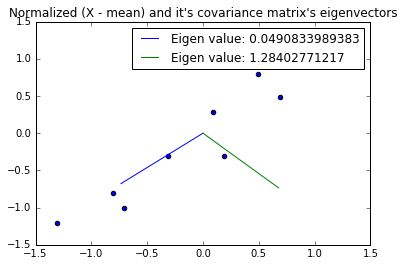

In [172]:
import matplotlib.pyplot as plt
plt.title("Normalized (X - mean) and it's covariance matrix's eigenvectors")
plt.scatter(x,y)
z=0
for vec, val in zip(eig_vecs, eig_vals):
    q=z
    z=plt.plot([0,vec[0]],[0, vec[1]], label='Eigen value: {:}'.format(val))
    
    lines.append(z)
plt.legend(handles=q+z)

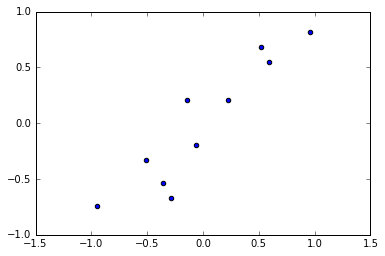

In [181]:
def pca_transform(x, y):
    return np.array(10)* np.array([x,y])
q = [pca_transform(x_i,y_i) for x_i, y_i in zip(x,y)]
x_pca, y_pca = zip(*q)
plt.scatter(x_pca, y_pca)